<a href="https://colab.research.google.com/github/SundharessB/Natural-Language-Processing/blob/main/2348564_NLPlab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import re
import matplotlib.pyplot as plt
import nltk
from nltk import ngrams, pos_tag, FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
# Sample text for analysis
text = """
Despite the recent advances in artificial intelligence, there remains an enduring concern regarding the ethical implications of its use. Many don't appreciate the complexity involved in teaching machines to mimic human decision-making. This technological domain has been both lauded and criticized, marking a pivotal epoch in computational history. Should you wish to discuss this further, please contact me at ai_ethics_inquiry@example.com or call me at +1-202-555-0189. Born on the threshold of the new millennium (27-March-2000), I have witnessed these groundbreaking developments firsthand.
"""



In [6]:
# a. Count the number of unique tokens in the text.
tokens = word_tokenize(text)
unique_tokens = set(tokens)
print(f'Number of unique tokens: {len(unique_tokens)}')


Number of unique tokens: 78


In [7]:
# b. Count the number of punctuation characters and remove punctuations.
punctuation = re.findall(r'[^\w\s]', text)
text_no_punct = re.sub(r'[^\w\s]', '', text)
print(f'Number of punctuation characters: {len(punctuation)}')
print(f'Text without punctuation: {text_no_punct}')



Number of punctuation characters: 21
Text without punctuation: 
Despite the recent advances in artificial intelligence there remains an enduring concern regarding the ethical implications of its use Many dont appreciate the complexity involved in teaching machines to mimic human decisionmaking This technological domain has been both lauded and criticized marking a pivotal epoch in computational history Should you wish to discuss this further please contact me at ai_ethics_inquiryexamplecom or call me at 12025550189 Born on the threshold of the new millennium 27March2000 I have witnessed these groundbreaking developments firsthand



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


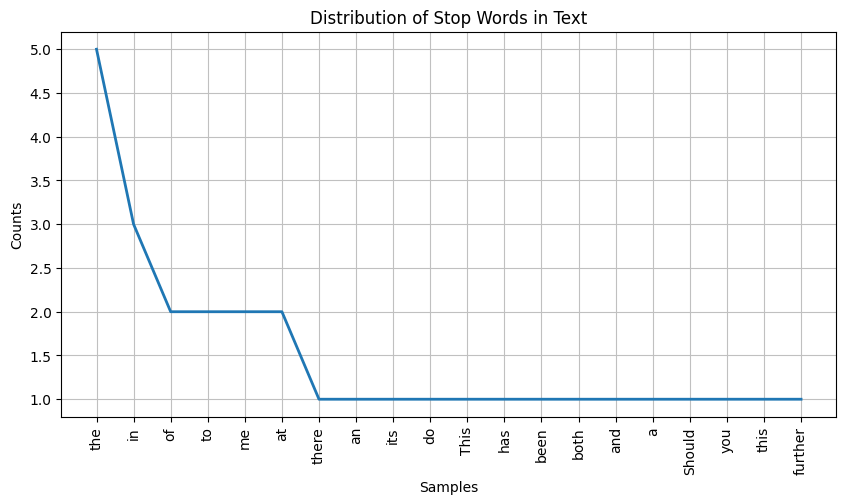

In [8]:
# c. Plot the distribution of stopwords used in the text using barplot.
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words_in_text = [word for word in tokens if word.lower() in stop_words]
stop_words_distribution = FreqDist(stop_words_in_text)
plt.figure(figsize=(10,5))
stop_words_distribution.plot(20, title='Distribution of Stop Words in Text')
plt.show()


In [9]:
# d. Remove the stopwords from the text.
filtered_words = [word for word in tokens if word.lower() not in stop_words]
print(f'Text without stopwords: {" ".join(filtered_words)}')



Text without stopwords: Despite recent advances artificial intelligence , remains enduring concern regarding ethical implications use . Many n't appreciate complexity involved teaching machines mimic human decision-making . technological domain lauded criticized , marking pivotal epoch computational history . wish discuss , please contact ai_ethics_inquiry @ example.com call +1-202-555-0189 . Born threshold new millennium ( 27-March-2000 ) , witnessed groundbreaking developments firsthand .


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


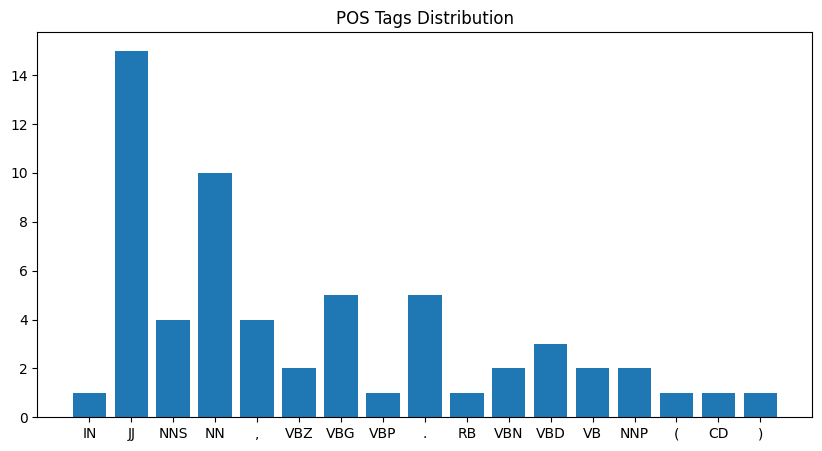

In [10]:
# e. Plot the distribution of each POS Tag using a barplot.
nltk.download('averaged_perceptron_tagger')
pos_tags = pos_tag(filtered_words)
pos_counts = Counter(tag for word, tag in pos_tags)
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title('POS Tags Distribution')
plt.show()


In [11]:

# f. Determine the number of unique lemma available in the text.
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(w) for w in filtered_words]
unique_lemmas = set(lemmas)
print(f'Number of unique lemmas: {len(unique_lemmas)}')


[nltk_data] Downloading package wordnet to /root/nltk_data...


Number of unique lemmas: 53


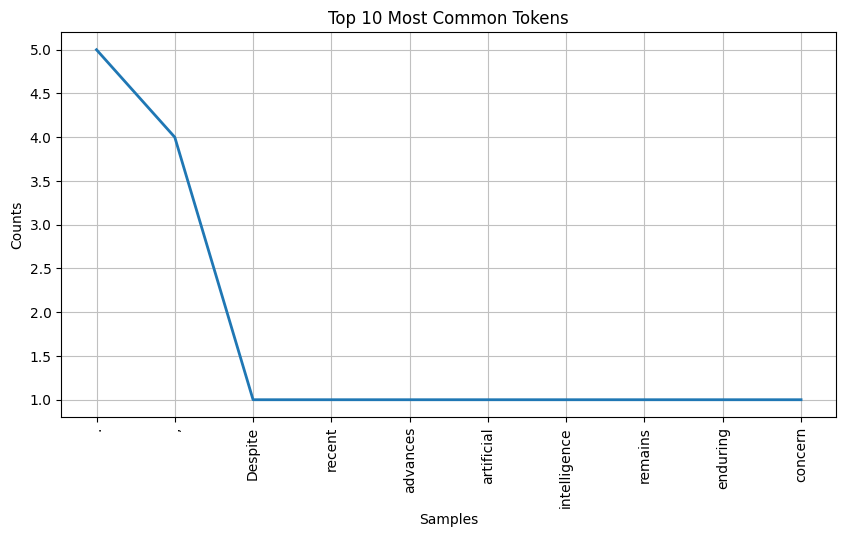

In [12]:
# g. Plot the frequency distribution of words in the text. Display only the top 10.
freq_dist = FreqDist(filtered_words)
plt.figure(figsize=(10,5))
freq_dist.plot(10, title='Top 10 Most Common Tokens')
plt.show()


In [13]:
# h. Find the number of unique bigrams, trigrams and quadgrams in the corpus
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
quadgrams = list(ngrams(tokens, 4))
unique_bigrams = len(set(bigrams))
unique_trigrams = len(set(trigrams))
unique_quadgrams = len(set(quadgrams))
print(f'Unique bigrams: {unique_bigrams}')
print(f'Unique trigrams: {unique_trigrams}')
print(f'Unique quadgrams: {unique_quadgrams}')



Unique bigrams: 93
Unique trigrams: 93
Unique quadgrams: 92


In [18]:
# i. Find all dates and convert them to the DD-MM-YYYY format.

import datetime
dates = re.findall(r'\d{1,2}-[A-Za-z]+-\d{4}', text)
new_dates_format = [datetime.datetime.strptime(date, '%d-%B-%Y').strftime('%d-%m-%Y') for date in dates]
print(f'Dates converted to DD-MM-YYYY format: {new_dates_format}')


Dates converted to DD-MM-YYYY format: ['27-03-2000']


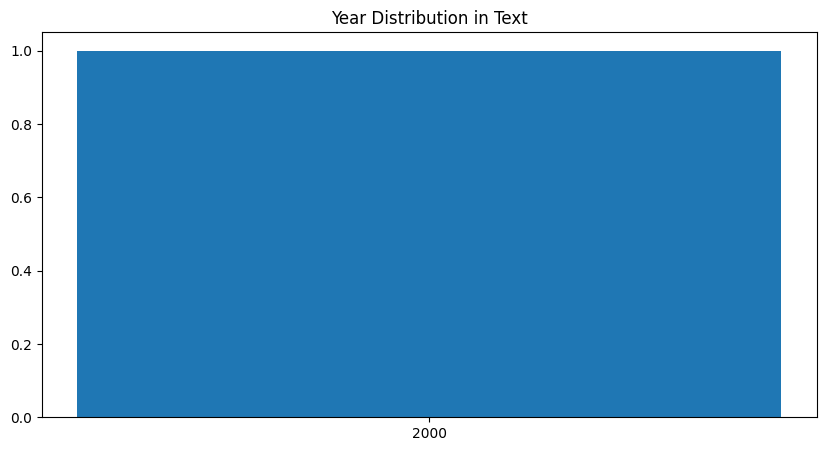

In [32]:
import re
import matplotlib.pyplot as plt
from collections import Counter

text = """
Despite the recent advances in artificial intelligence, there remains an enduring concern regarding the ethical implications of its use. Many don't appreciate the complexity involved in teaching machines to mimic human decision-making. This technological domain has been both lauded and criticized, marking a pivotal epoch in computational history. Should you wish to discuss this further, please contact me at ai_ethics_inquiry@example.com or call me at +1-202-555-0189. Born on the threshold of the new millennium (27-March-2000), I have witnessed these groundbreaking developments firsthand.
"""

# Define the regex pattern for identifying years contextually
year_pattern = r'\b(19\d{2}|20\d{2})\b'

# Find all years in the text
years = re.findall(year_pattern, text)

# Plot the distribution of the different values of year occurring in the text
year_counts = Counter(years)
plt.figure(figsize=(10, 5))
plt.bar(year_counts.keys(), year_counts.values())
plt.title('Year Distribution in Text')
plt.show()


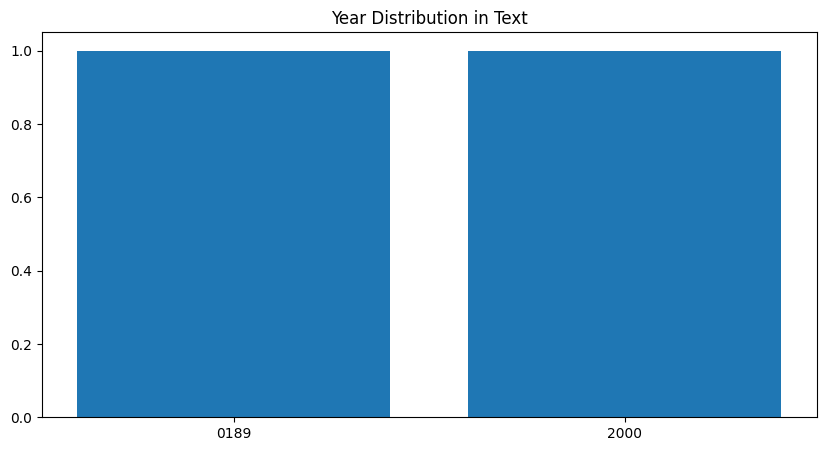

In [20]:
# j. Plot a distribution of the different values of year occurring in the text.
years = re.findall(r'\d{4}', text)

year_counts = Counter(years)
plt.figure(figsize=(10, 5))
plt.bar(year_counts.keys(), year_counts.values())
plt.title('Year Distribution in Text')
plt.show()


In [21]:
# k. Determine whether the text contains any phone numbers in it. Ensure the phone numbers are valid if any. If an invalid phone number is found, remove it from the text.
phone_numbers = re.findall(r'(\+\d{1,3}\s?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4})', text)
valid_phone_numbers = [number for number in phone_numbers if re.match(r'^(\+\d{1,3}\s?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4})', number)]
print(f'Valid phone numbers: {valid_phone_numbers}')


Valid phone numbers: []


In [22]:
print(text)


Despite the recent advances in artificial intelligence, there remains an enduring concern regarding the ethical implications of its use. Many don't appreciate the complexity involved in teaching machines to mimic human decision-making. This technological domain has been both lauded and criticized, marking a pivotal epoch in computational history. Should you wish to discuss this further, please contact me at ai_ethics_inquiry@example.com or call me at +1-202-555-0189. Born on the threshold of the new millennium (27-March-2000), I have witnessed these groundbreaking developments firsthand.



In [29]:
# Define the regex pattern for identifying phone numbers
phone_number_pattern = r'\b\+?[0-9][0-9-()]{8,20}\b'

# Remove the phone number from the text
cleaned_text = re.sub(phone_number_pattern, '', text)

# Print the cleaned text without the phone number
print("Cleaned text without the phone number:")
print(cleaned_text)

# Find and print the removed phone number
removed_phone_number = re.findall(phone_number_pattern, text)
print("\nRemoved phone number:")
print(removed_phone_number)


Cleaned text without the phone number:

Despite the recent advances in artificial intelligence, there remains an enduring concern regarding the ethical implications of its use. Many don't appreciate the complexity involved in teaching machines to mimic human decision-making. This technological domain has been both lauded and criticized, marking a pivotal epoch in computational history. Should you wish to discuss this further, please contact me at ai_ethics_inquiry@example.com or call me at +. Born on the threshold of the new millennium (27-March-2000), I have witnessed these groundbreaking developments firsthand.


Removed phone number:
['1-202-555-0189']
